
## **Market Basket Analysis (MBA) Case Study**

Perform Market Basket Analysis to:
* Identify patterns in consumer decision-making
* Use metrics to evaluate the properties of patterns.
* Construct "rules" that provide concrete recommendations for businesses.
* Visualize patterns and rules 

## **The dataset**

** The dataset is divided into three CSV files:**
1. `olist_order_items_dataset.csv`
2. `olist_products_dataset.csv`
3. `product_category_name_translation.csv`

**The column definitions are as follows:**
`olist_order_items_dataset.csv`:
- `order_id`: The unique identifier for a transaction.
- `order_item_id`: The order of an item within a transaction.
- `product_id`: The unique identifier for a product.
- `price`: The product's price.

`olist_products_dataset.csv`:
- `product_id`: The unique identifier for a product.
- `product_category_name`: The name of an item's product category in Portuguese.
- `product_weight_g`: The product's weight in grams.
- `product_length_cm`: The product's length in centimeters.
- `product_width_cm`: The product's width in centimeters.
- `product_height_cm`: The product's height in centimeters.

`product_category_name_translation.csv`:
- `product_category_name`: The name of an item's product category in Portuguese.
- `product_category_name_english`: The name of an item's product category in English.

## **Data Background**

** This case study is based on over 100,000 orders.Olist connects sellers to marketplaces where sellers register their products. Customer makes purchase at marketplace using the Olist store where sellers fulfill their orders.

## **Answer all the following Questions**

In [1]:
pip install mlxtend 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 23.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the required packages for MBA.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np



### **Data Loading**

In [3]:


# Load orders dataset
orders = pd.read_csv('data/order_items_dataset.csv')

# Load products dataset
products = pd.read_csv('data/products_dataset.csv')

# Load translations dataset
translations = pd.read_csv('data/product_category_name_translation.csv')



In [4]:
# Print orders header for orders dataset.
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [5]:
# Print orders information for oders dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [6]:
# Print products dataset header.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [7]:
# Print products info.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [8]:
# Print translations header.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


---
<center><h1> Q&A 1</h1> </center>

---

### **Translating item category names**

**The product names are given in Portuguese.**
  * We'll translate the names to English using a `pandas` `DataFrame` named `translations`.
  * `.merge()` performs a join operation on columns or indices.
  * `on` is the column on which to perform the join.
  * `how` specifies which keys to use to perform the join. 

In [10]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

### **Convert product IDs to product category names.**

**We can work with product IDs directly, but do not have product names.**
  * Map product IDs to product category names, which are available in `products`.
  * Use another `.merge()` with `orders` and subset of `products` columns.
  
**Using category names will also simplify the analysis, since there are fewer categories than products.**

In [11]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [12]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [13]:
# Drop products without a defined category.
orders = orders.dropna(subset=['product_category_name_english'])


In [14]:
# Print number of unique items.
print("\nNumber of Unique Items:")
print(orders['product_id'].nunique())


Number of Unique Items:
32328


In [15]:
# Print number of unique categories.
print("\nNumber of Unique Categories:")
print(orders['product_category_name_english'].nunique())


Number of Unique Categories:
71


### **Construct transactions from order and product data**

In [16]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
print("\nExample Order (fe64170e936bc5f6a6a41def260984b9):")
print(example1)


Example Order (fe64170e936bc5f6a6a41def260984b9):
111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object


In [17]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Print example.
print("\nExample Order (fffb9224b6fc7c43ebb0904318b10b5f):")
print(example2)


Example Order (fffb9224b6fc7c43ebb0904318b10b5f):
112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object


In [18]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby('order_id')['product_category_name_english'].apply(list)
transactions = transactions.reset_index(drop=True)

# Print transactions header.
print("\nTransactions Header:")
print(transactions.head())


Transactions Header:
0         [cool_stuff]
1           [pet_shop]
2    [furniture_decor]
3            [perfume]
4       [garden_tools]
Name: product_category_name_english, dtype: object


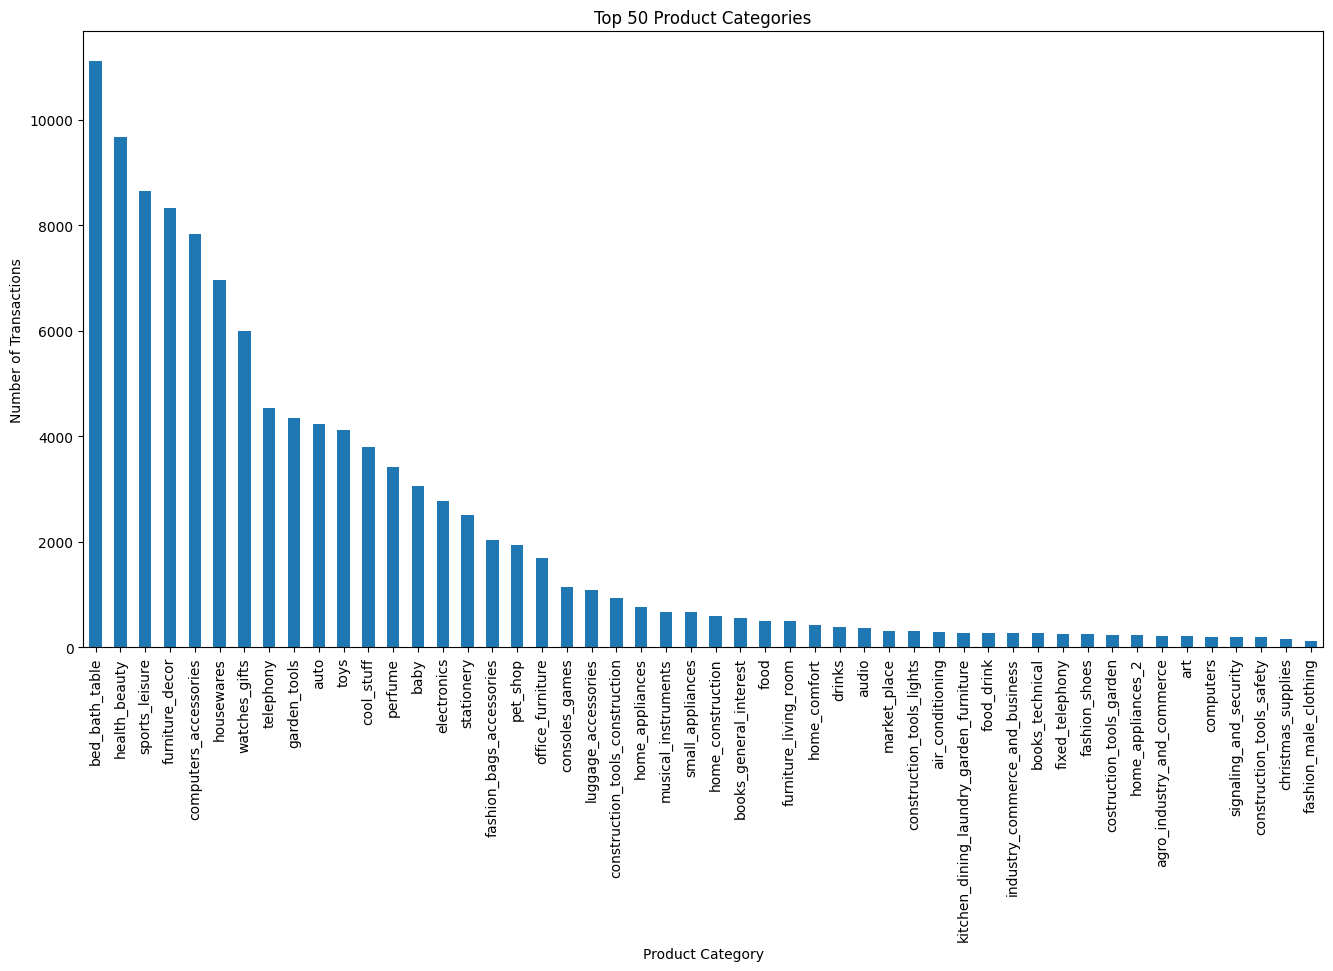

In [19]:
# Plot 50 largest categories of transactions.
category_counts = orders['product_category_name_english'].value_counts().nlargest(50)
plt.figure(figsize=(16, 8))
category_counts.plot(kind='bar')
plt.title('Top 50 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

## ** Give any two insights from your above analysis:**
<br>1. Dominance of Bed, Bath & Table: The "bed_bath_table" category has a significantly higher number of transactions compared to other categories. This suggests that products related to home furnishings and linens are very popular among customers.

<br>
2.Health & Beauty as a Strong Second: "Health_beauty" is the second most frequent category. This suggests a strong market for personal care and beauty products within this e-commerce platform. These product could also bundled and market together to further boost sales.



In [20]:
# Convert the pandas series to list of lists.
transactions_list = transactions.tolist()

### **Summarize final transaction data**

In [21]:
# Print length of transactions.
print("\nNumber of Transactions:")
print(len(transactions_list))



Number of Transactions:
97256


In [22]:
# Count number of unique item categories for each transaction.
num_unique_items = [len(set(transaction)) for transaction in transactions_list]


In [23]:
# Print median number of items in a transaction.
print("\nMedian Number of Items in a Transaction:")
print(np.median(num_unique_items))


Median Number of Items in a Transaction:
1.0


In [24]:
# Print maximum number of items in a transaction.
print("\nMaximum Number of Items in a Transaction:")
print(np.max(num_unique_items))


Maximum Number of Items in a Transaction:
3


## **Association Rules and Metrics**

In [25]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions_list)
# Transform lists into one-hot encoded array.
one_hot = encoder.transform(transactions_list)
# Convert array to pandas DataFrame.
one_hot_df = pd.DataFrame(one_hot, columns=encoder.columns_)

In [26]:
# Print header.
print("\nOne-Hot Encoded DataFrame Header:")
print(one_hot_df.head())


One-Hot Encoded DataFrame Header:
   agro_industry_and_commerce  air_conditioning    art  arts_and_crafts  \
0                       False             False  False            False   
1                       False             False  False            False   
2                       False             False  False            False   
3                       False             False  False            False   
4                       False             False  False            False   

   audio   auto   baby  bed_bath_table  books_general_interest  \
0  False  False  False           False                   False   
1  False  False  False           False                   False   
2  False  False  False           False                   False   
3  False  False  False           False                   False   
4  False  False  False           False                   False   

   books_imported  ...  security_and_services  signaling_and_security  \
0           False  ...                  Fals

In [27]:
# Print support metric over all rows for each column.
support = one_hot_df.mean()
print("\nSupport Metric per Category:")
print(support)


Support Metric per Category:
agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64


### **Describe the support metric observations:** 
<br> 1. 
<br>2. <br>
3.



### **Compute the item count distribution over transactions**

In [28]:
# Print distribution of item counts.
item_counts = one_hot_df.sum(axis=1)
print("\nDistribution of Item Counts:")
print(item_counts.describe())


Distribution of Item Counts:
count    97256.000000
mean         1.007619
std          0.088711
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
dtype: float64


## ** Give any two insights from your above analysis:**
<br>1. <br>
2.



### **Create a column for an itemset with multiple items**

In [29]:
# Add sports_leisure and health_beauty to DataFrame.
one_hot_df['sports_leisure'] = orders['product_category_name_english'].str.contains('sports_leisure', case=False).any()
one_hot_df['health_beauty'] = orders['product_category_name_english'].str.contains('health_beauty', case=False).any()

# Print support value.
print("\nSupport value after add 'sports_leisure' and 'health_beauty' features:")
print(one_hot_df[['sports_leisure','health_beauty']].mean())


Support value after add 'sports_leisure' and 'health_beauty' features:
sports_leisure    1.0
health_beauty     1.0
dtype: float64


## ** Give any two insights from your above analysis:**
<br>1. <br>
2.



### **Aggregate the dataset further by combining product sub-categories**

In [30]:
# Merge books_imported and books_technical.
one_hot_df['books'] = one_hot_df['books_imported'] | one_hot_df['books_technical']

# Remove the original columns
one_hot_df = one_hot_df.drop(['books_imported', 'books_technical'], axis=1)

# Print support values for books, books_imported, and books_technical
print("Support value for 'books':", one_hot_df['books'].mean())
print("Support value for 'books_imported':", support['books_imported'])
print("Support value for 'books_technical':", support['books_technical'])



Support value for 'books': 0.003218310438430534
Support value for 'books_imported': 0.0005449535247182693
Support value for 'books_technical': 0.0026733569137122647


### **Compute the confidence metric**

In [31]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (one_hot_df['sports_leisure'] & one_hot_df['health_beauty']).mean()
print("\nJoint Support (sports_leisure and health_beauty):")
print(joint_support)
# Print confidence metric for sports_leisure -> health_beauty.
confidence_sports_to_health = (one_hot_df[one_hot_df['sports_leisure']]['health_beauty']).mean()
print("\nConfidence (sports_leisure -> health_beauty):")
print(confidence_sports_to_health)


Joint Support (sports_leisure and health_beauty):
1.0

Confidence (sports_leisure -> health_beauty):
1.0


In [32]:
# Print confidence for health_beauty -> sports_leisure.
confidence_health_to_sports = (one_hot_df[one_hot_df['health_beauty']]['sports_leisure']).mean()
print("\nConfidence (health_beauty -> sports_leisure):")
print(confidence_health_to_sports)


Confidence (health_beauty -> sports_leisure):
1.0


## ** Give any three insights from your confidence metric analysis:**
<br>1. 
<br>2. <br>
3.



### **Applying the Apriori algorithm**

* Use `apriori()` to identify frequent itemsets.
* `min_support` set the item frequency threshold used for pruning.

In [33]:
# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets_001 = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# Print frequent itemsets.
print("\nFrequent Itemsets (min_support=0.01):")
print(frequent_itemsets_001)



Frequent Itemsets (min_support=0.01):
     support                                        itemsets
0   0.040070                                          (auto)
1   0.029664                                          (baby)
2   0.096827                                (bed_bath_table)
3   0.068777                         (computers_accessories)
4   0.010920                                (consoles_games)
..       ...                                             ...
74  0.017582       (pet_shop, health_beauty, sports_leisure)
75  0.023762     (sports_leisure, stationery, health_beauty)
76  0.043175      (sports_leisure, health_beauty, telephony)
77  0.039956           (sports_leisure, toys, health_beauty)
78  0.057827  (watches_gifts, health_beauty, sports_leisure)

[79 rows x 2 columns]


## ** What are the insights you observed from your above analysis:**
<br>1. <br>
2.



In [34]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets_0001 = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Print frequent itemsets.
print("\nFrequent Itemsets (min_support=0.001):")
print(frequent_itemsets_0001)


Frequent Itemsets (min_support=0.001):
      support                                        itemsets
0    0.001871                    (agro_industry_and_commerce)
1    0.002601                              (air_conditioning)
2    0.002077                                           (art)
3    0.003599                                         (audio)
4    0.040070                                          (auto)
..        ...                                             ...
194  0.023762     (sports_leisure, stationery, health_beauty)
195  0.043175      (sports_leisure, health_beauty, telephony)
196  0.039956           (sports_leisure, toys, health_beauty)
197  0.057827  (watches_gifts, health_beauty, sports_leisure)
198  0.003218          (sports_leisure, health_beauty, books)

[199 rows x 2 columns]


## ** Give any two insights from your above analysis:**
<br>1. <br>
2.



In [35]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets_00005 = apriori(one_hot_df, min_support=0.00005, use_colnames=True)


# Print frequent itemsets.
print("\nFrequent Itemsets (min_support=0.00005):")
print(frequent_itemsets_00005)


Frequent Itemsets (min_support=0.00005):
      support                                           itemsets
0    0.001871                       (agro_industry_and_commerce)
1    0.002601                                 (air_conditioning)
2    0.002077                                              (art)
3    0.000236                                  (arts_and_crafts)
4    0.003599                                            (audio)
..        ...                                                ...
390  0.000072  (watches_gifts, health_beauty, sports_leisure,...
391  0.000072  (sports_leisure, health_beauty, garden_tools, ...
392  0.000113  (sports_leisure, health_beauty, housewares, ga...
393  0.000051  (luggage_accessories, stationery, health_beaut...
394  0.000062  (sports_leisure, stationery, health_beauty, toys)

[395 rows x 2 columns]


In [36]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets_2item = apriori(one_hot_df, min_support=0.001, use_colnames=True, max_len=2)

### **Computing association rules from Apriori output**

In [37]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules_support = association_rules(frequent_itemsets_0001, metric="support", min_threshold=0.0001)

# Print rules header.
print("\nAssociation Rules (metric=support, min_threshold=0.0001):")
print(rules_support.head())


Association Rules (metric=support, min_threshold=0.0001):
                    antecedents                   consequents  \
0               (health_beauty)  (agro_industry_and_commerce)   
1  (agro_industry_and_commerce)               (health_beauty)   
2              (sports_leisure)  (agro_industry_and_commerce)   
3  (agro_industry_and_commerce)              (sports_leisure)   
4               (health_beauty)            (air_conditioning)   

   antecedent support  consequent support   support  confidence  lift  \
0            1.000000            0.001871  0.001871    0.001871   1.0   
1            0.001871            1.000000  0.001871    1.000000   1.0   
2            1.000000            0.001871  0.001871    0.001871   1.0   
3            0.001871            1.000000  0.001871    1.000000   1.0   
4            1.000000            0.002601  0.002601    0.002601   1.0   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0       0.0 

C:\Users\siddh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


**What is your major observations and insights here?**
<br>
<br>

### **Pruning association rules**

In [38]:
rules_confidence = association_rules(frequent_itemsets_0001, metric="confidence", min_threshold=0.01)# Recover association rules using confidence threshold of 0.01.
rules_confidence = association_rules(frequent_itemsets_0001, metric="confidence", min_threshold=0.01)

# Print rules.
print("\nAssociation Rules (metric=confidence, min_threshold=0.01):")
print(rules_confidence.head())


Association Rules (metric=confidence, min_threshold=0.01):
                    antecedents       consequents  antecedent support  \
0  (agro_industry_and_commerce)   (health_beauty)            0.001871   
1  (agro_industry_and_commerce)  (sports_leisure)            0.001871   
2            (air_conditioning)   (health_beauty)            0.002601   
3            (air_conditioning)  (sports_leisure)            0.002601   
4                         (art)   (health_beauty)            0.002077   

   consequent support   support  confidence  lift  representativity  leverage  \
0                 1.0  0.001871         1.0   1.0               1.0       0.0   
1                 1.0  0.001871         1.0   1.0               1.0       0.0   
2                 1.0  0.002601         1.0   1.0               1.0       0.0   
3                 1.0  0.002601         1.0   1.0               1.0       0.0   
4                 1.0  0.002077         1.0   1.0               1.0       0.0   

   conviction 

C:\Users\siddh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
C:\Users\siddh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [39]:
# Select rules with a consequent support above 0.095.
rules_consequent_support = rules_confidence[rules_confidence['consequent support'] > 0.095]

# Print rules.
print("\nRules with Consequent Support > 0.095:")
print(rules_consequent_support.head())


Rules with Consequent Support > 0.095:
                    antecedents       consequents  antecedent support  \
0  (agro_industry_and_commerce)   (health_beauty)            0.001871   
1  (agro_industry_and_commerce)  (sports_leisure)            0.001871   
2            (air_conditioning)   (health_beauty)            0.002601   
3            (air_conditioning)  (sports_leisure)            0.002601   
4                         (art)   (health_beauty)            0.002077   

   consequent support   support  confidence  lift  representativity  leverage  \
0                 1.0  0.001871         1.0   1.0               1.0       0.0   
1                 1.0  0.001871         1.0   1.0               1.0       0.0   
2                 1.0  0.002601         1.0   1.0               1.0       0.0   
3                 1.0  0.002601         1.0   1.0               1.0       0.0   
4                 1.0  0.002077         1.0   1.0               1.0       0.0   

   conviction  zhangs_metric   jac

In [40]:
# Select rules with leverage higher than 0.0.
rules_leverage = rules_confidence[rules_confidence['leverage'] > 0.0]
# Print rules.
print("\nRules with Leverage > 0.0:")
print(rules_leverage.head())


Rules with Leverage > 0.0:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


## ** Give any three insights from your above analysis:**
<br>1. none <br>
<br>2. none<br>
3. none




### **Visualizing patterns in metrics**